In [17]:
!pip install seaborn==0.9.0

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [0]:
mapa = {'total_bill':'valor_conta', 'tip':'gorjeta', 'dessert':'sobremesa', 'day':'dia_semana', 'time':'horario', 'size':'tamanho_mesa'}

In [21]:
dados = dados.rename(columns = mapa)
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,horario,tamanho_mesa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [22]:
dados.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [23]:
dados.dia_semana

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
5       Sun
6       Sun
7       Sun
8       Sun
9       Sun
10      Sun
11      Sun
12      Sun
13      Sun
14      Sun
15      Sun
16      Sun
17      Sun
18      Sun
19      Sat
20      Sat
21      Sat
22      Sat
23      Sat
24      Sat
25      Sat
26      Sat
27      Sat
28      Sat
29      Sat
       ... 
214     Sat
215     Sat
216     Sat
217     Sat
218     Sat
219     Sat
220     Fri
221     Fri
222     Fri
223     Fri
224     Fri
225     Fri
226     Fri
227     Sat
228     Sat
229     Sat
230     Sat
231     Sat
232     Sat
233     Sat
234     Sat
235     Sat
236     Sat
237     Sat
238     Sat
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: dia_semana, Length: 244, dtype: object

In [24]:
mapa = {'Sun':'Domingo', 'Sat':'Sabado', 'Thur':'Quinta', 'Fri':'Sexta'}
dados.dia_semana = dados.dia_semana.map(mapa)
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,horario,tamanho_mesa
0,16.99,1.01,No,Domingo,Dinner,2
1,10.34,1.66,No,Domingo,Dinner,3
2,21.01,3.50,No,Domingo,Dinner,3
3,23.68,3.31,No,Domingo,Dinner,2
4,24.59,3.61,No,Domingo,Dinner,4


In [25]:
dados.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [26]:
mapa = {'Dinner':'Jantar', 'Lunch':'Almoço'}
dados.horario = dados.horario.map(mapa)
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,horario,tamanho_mesa
0,16.99,1.01,No,Domingo,Jantar,2
1,10.34,1.66,No,Domingo,Jantar,3
2,21.01,3.50,No,Domingo,Jantar,3
3,23.68,3.31,No,Domingo,Jantar,2
4,24.59,3.61,No,Domingo,Jantar,4


In [27]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
mapa = {"No":"0", "Yes":"1"}
dados.sobremesa = dados.sobremesa.map(mapa)
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,horario,tamanho_mesa
0,16.99,1.01,0,Domingo,Jantar,2
1,10.34,1.66,0,Domingo,Jantar,3
2,21.01,3.50,0,Domingo,Jantar,3
3,23.68,3.31,0,Domingo,Jantar,2
4,24.59,3.61,0,Domingo,Jantar,4


In [29]:
dados.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'horario',
       'tamanho_mesa'],
      dtype='object')

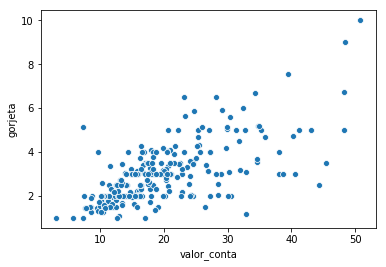

In [30]:
sb.scatterplot(data=dados, x='valor_conta', y='gorjeta')

In [43]:
dados.query('gorjeta!=0').count()

valor_conta     244
gorjeta         244
sobremesa       244
dia_semana      244
horario         244
tamanho_mesa    244
dtype: int64

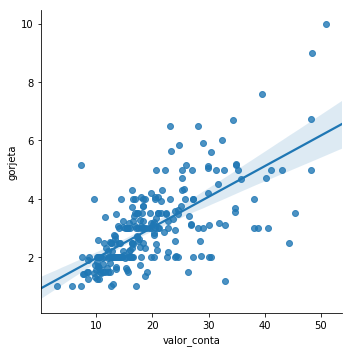

In [32]:
sb.lmplot(data=dados, x='valor_conta', y='gorjeta')

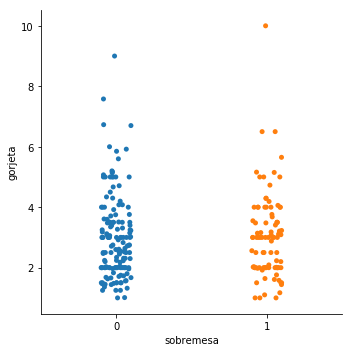

In [49]:
sb.catplot(data=dados, x='sobremesa', y='gorjeta')

In [0]:
sobremesa_0 = dados.query('sobremesa=="0"')

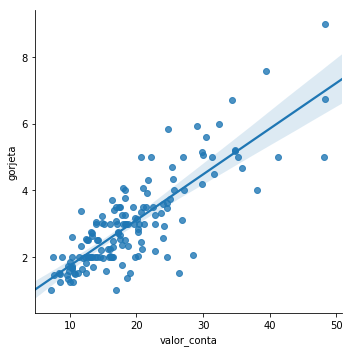

In [47]:
sb.lmplot(data=sobremesa_0, x='valor_conta', y='gorjeta')

In [0]:
sobremesa_1 = dados.query('sobremesa=="1"')

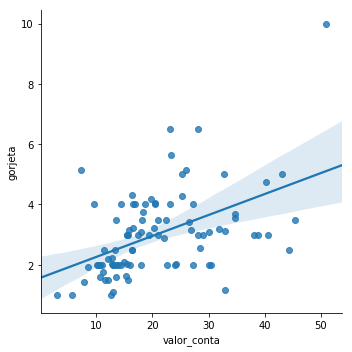

In [48]:
sb.lmplot(data=sobremesa_1, x='valor_conta', y='gorjeta')

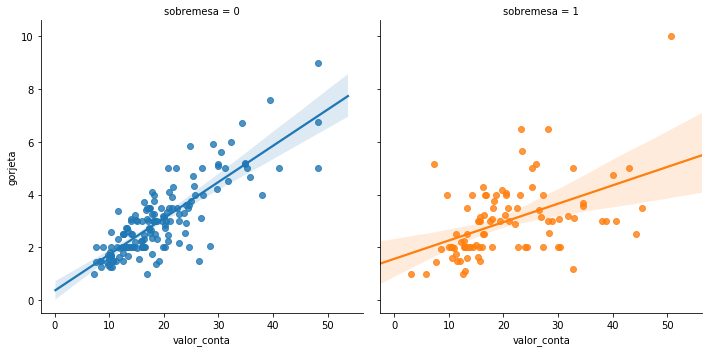

In [51]:
sb.lmplot(data=dados, x='valor_conta', y='gorjeta', col='sobremesa', hue='sobremesa')

In [69]:
dados['porcentagem']=dados.gorjeta / dados.valor_conta 
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,horario,tamanho_mesa,porcentagem
0,16.99,1.01,0,Domingo,Jantar,2,0.059447
1,10.34,1.66,0,Domingo,Jantar,3,0.160542
2,21.01,3.50,0,Domingo,Jantar,3,0.166587
3,23.68,3.31,0,Domingo,Jantar,2,0.139780
4,24.59,3.61,0,Domingo,Jantar,4,0.146808


In [73]:
dados.query('sobremesa=="0"').porcentagem.describe()

count    151.000000
mean       0.159328
std        0.039910
min        0.056797
25%        0.136906
50%        0.155625
75%        0.185014
max        0.291990
Name: porcentagem, dtype: float64

In [74]:
dados.query('sobremesa=="1"').porcentagem.describe()

count    93.000000
mean      0.163196
std       0.085119
min       0.035638
25%       0.106771
50%       0.153846
75%       0.195059
max       0.710345
Name: porcentagem, dtype: float64

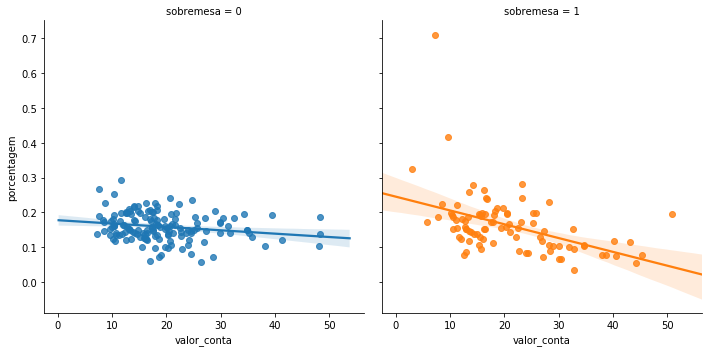

In [58]:
sb.lmplot(data=dados, y='porcentagem', x='valor_conta', col='sobremesa', hue='sobremesa')

In [75]:
#TESTE DE HIPOTESE
#Usando essa técnica, caso possuamos um pvalue > 0.05 nós sempre ficamos com a hipotese nula, de que a distribuição é igual nos dois grupos
from scipy.stats import ranksums

sobremesa_0_porcentagem = dados.query('sobremesa=="0"').porcentagem
sobremesa_1_porcentagem = dados.query('sobremesa=="1"').porcentagem

ranksums(sobremesa_0_porcentagem, sobremesa_1_porcentagem)

RanksumsResult(statistic=0.5826828381528689, pvalue=0.5601068283978767)

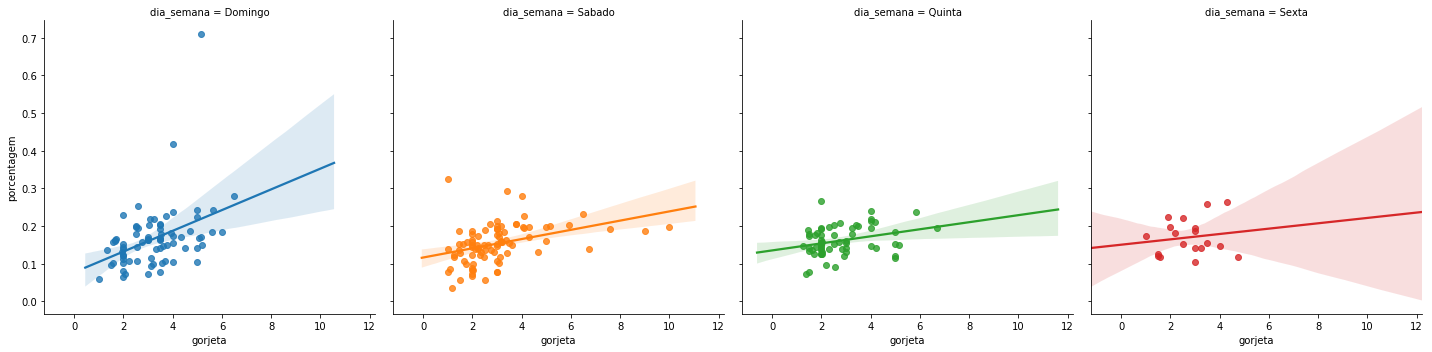

In [81]:
sb.lmplot(data=dados, col='dia_semana', x='gorjeta', y='porcentagem', hue='dia_semana')

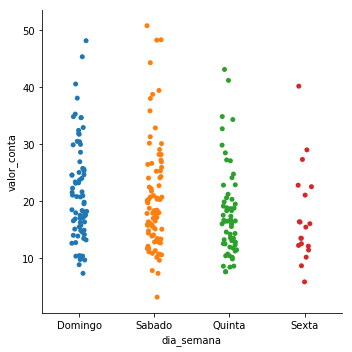

In [80]:
sb.catplot(x='dia_semana', y='valor_conta', data=dados)

In [83]:
dados.groupby('dia_semana').mean()

,valor_conta,gorjeta,tamanho_mesa,porcentagem
dia_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166897
Quinta,17.682742,2.771452,2.451613,0.161276
Sabado,20.441379,2.993103,2.517241,0.153152
Sexta,17.151579,2.734737,2.105263,0.169913


In [84]:
dados.dia_semana.value_counts()

Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64